# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Read Dataset

In [2]:
Train = pd.read_csv(r"D:\Machine Learning\Digit Recognizer\Data\train.csv")
Test = pd.read_csv(r"D:\Machine Learning\Digit Recognizer\Data\test.csv")

# Exploratory Data Analysis

We used 42000 sample as training set
and 28000 as testing set

In [3]:
print("Train data shape => ", Train.shape)
print("Test data shape => ", Test.shape)

Train data shape =>  (42000, 785)
Test data shape =>  (28000, 784)


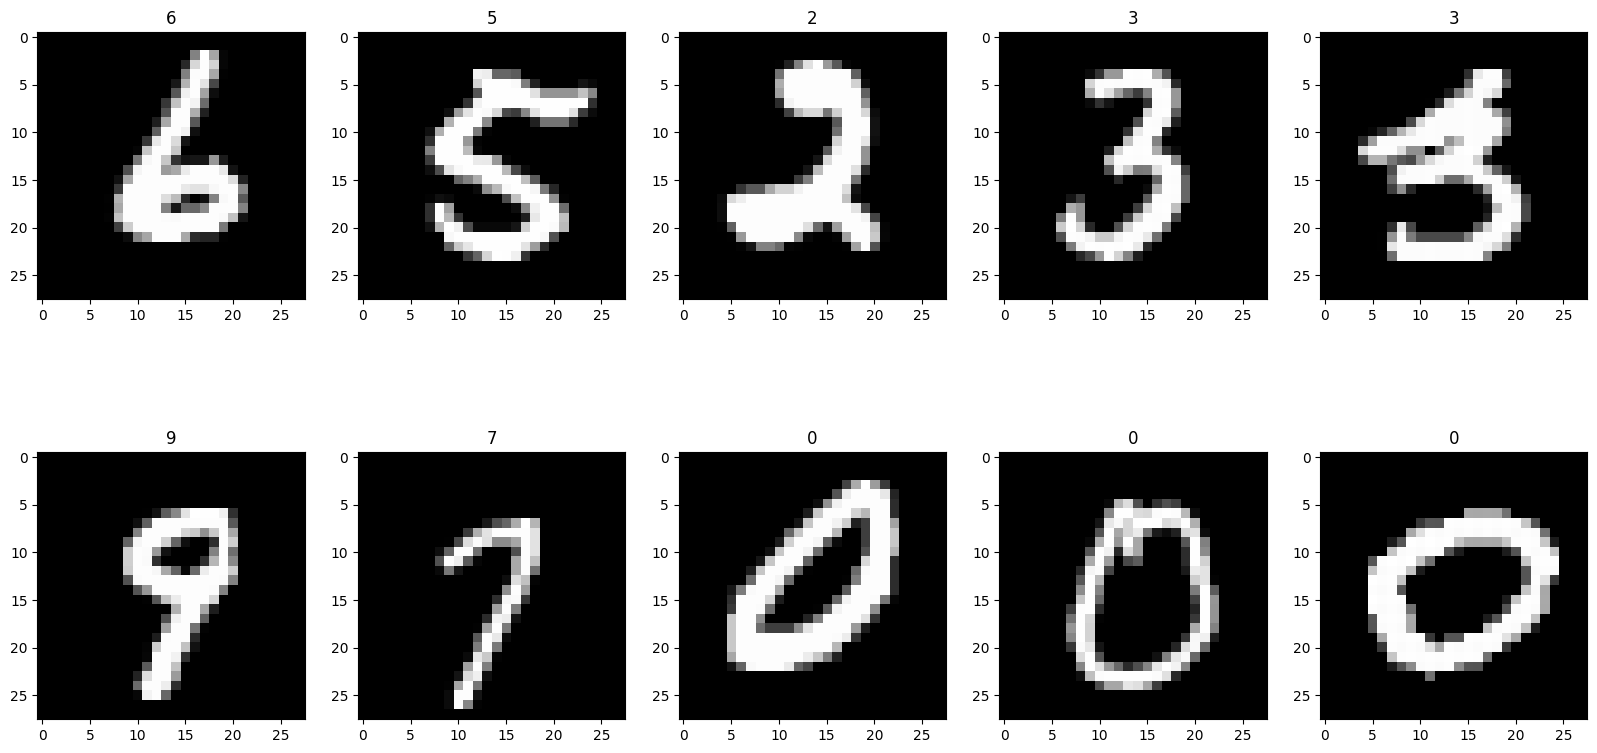

In [4]:
random_samples = Train.sample(10)
X_random_samples = random_samples.drop('label', axis=1)
X_random_samples = np.array(X_random_samples)
y_random_samples = random_samples['label']
y_random_samples = np.array(y_random_samples)
plt.figure(figsize=(20,10))
i = 1
for X, y in zip(X_random_samples, y_random_samples):
    X = np.reshape(X, newshape=(28,28))
    plt.subplot(2,5,i)
    plt.imshow(X, cmap='gray')
    plt.title(y)
    i += 1

# Splitting data

In [5]:
X = Train.drop('label', axis=1)
y = Train['label']
X = X/255.0
Test = Test / 255.0

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

# Model building

In [7]:
X_train.shape

(33600, 784)

In [8]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15)

Epoch 1/15
1050/1050 [==============================] - 5s 4ms/step - loss: 0.2735 - accuracy: 0.9162 - val_loss: 0.1441 - val_accuracy: 0.9564
Epoch 2/15
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1050 - accuracy: 0.9683 - val_loss: 0.1224 - val_accuracy: 0.9624
Epoch 3/15
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0704 - accuracy: 0.9775 - val_loss: 0.1141 - val_accuracy: 0.9645
Epoch 4/15
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0556 - accuracy: 0.9810 - val_loss: 0.1061 - val_accuracy: 0.9695
Epoch 5/15
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0419 - accuracy: 0.9863 - val_loss: 0.1044 - val_accuracy: 0.9706
Epoch 6/15
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0347 - accuracy: 0.9886 - val_loss: 0.1067 - val_accuracy: 0.9718
Epoch 7/15
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0304 - accuracy: 0.9897 - val_loss: 0.1067 - val_accuracy:

predicted = pd.DataFrame(columns='ImageId',index=)

1/1 [==============================] - 0s 132ms/step


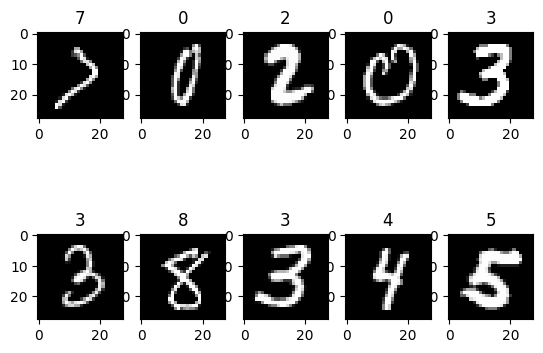

In [10]:
test_samples = Test.sample(10)
test_samples_predicted = model.predict(test_samples)
test_samples = np.array(test_samples).reshape(10,28,28)
pred = np.argmax(test_samples_predicted, axis=1)
i = 1
for X, y in zip(test_samples, pred):
    X = np.reshape(X, newshape=(28,28))
    plt.subplot(2,5,i)
    plt.imshow(X, cmap='gray')
    plt.title(y)
    i += 1

In [11]:
predicted = model.predict(Test)

875/875 [==============================] - 1s 1ms/step


In [12]:
predicted = np.argmax(predicted, axis=1)

In [13]:
Label = pd.DataFrame(predicted, columns=['Label'])
imageId = pd.DataFrame(np.arange(1,28001), columns=['ImageId'])
df = pd.concat([imageId, Label], axis='columns')
df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [14]:
df.to_csv(r"D:\Machine Learning\Digit Recognizer\Extracted.csv", index=False)